# 6.5 Machine Learning

# This script contains the following:
1. Importing libraries and data 
2. Data cleaning
3. The elbow technique
4. k-means clustering

# 1. Importing libraries and data 

In [20]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy
import folium
import json
import geopandas
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans 
import pylab as pl 
from sklearn.preprocessing import StandardScaler

In [21]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [22]:
path = r'C:\Users\Tim\Desktop\Data Analytics Intro\6. Advanced Analytics & Dashboard Design\Global Superstore_Data Analysis Project'

In [23]:
super_store = pd.read_csv(os.path.join(path, '02. Data', 'Prepared Data', 'superstore_clean.csv'))

# 2. Data cleaning

In [24]:
super_store.columns

Index(['Unnamed: 0', 'Category', 'City', 'Country', 'Customer.ID', 'Discount',
       'Market', 'Order.Date', 'Order.ID', 'Order.Priority', 'Product.ID',
       'Product.Name', 'Profit', 'Quantity', 'Region', 'Row.ID', 'Sales',
       'Segment', 'Ship.Date', 'Ship.Mode', 'Shipping.Cost', 'State',
       'Sub.Category', 'Year', 'Market2', 'weeknum'],
      dtype='object')

In [25]:
super_store.shape

(51290, 26)

In [26]:
super_store.head()

,Unnamed: 0,Category,City,Country,Customer.ID,Discount,Market,Order.Date,Order.ID,Order.Priority,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,0,Office Supplies,Los Angeles,United States,LS-172304,0.0,US,2011-01-07 00:00:00.000,CA-2011-130813,High,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,1,Office Supplies,Los Angeles,United States,MV-174854,0.0,US,2011-01-21 00:00:00.000,CA-2011-148614,Medium,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,2,Office Supplies,Los Angeles,United States,CS-121304,0.0,US,2011-08-05 00:00:00.000,CA-2011-118962,Medium,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,3,Office Supplies,Los Angeles,United States,CS-121304,0.0,US,2011-08-05 00:00:00.000,CA-2011-118962,Medium,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,4,Office Supplies,Los Angeles,United States,AP-109154,0.0,US,2011-09-29 00:00:00.000,CA-2011-146969,High,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40


In [27]:
# Check for missing values

super_store.isnull().sum()

# No missing values to handle

Unnamed: 0        0
Category          0
City              0
Country           0
Customer.ID       0
Discount          0
Market            0
Order.Date        0
Order.ID          0
Order.Priority    0
Product.ID        0
Product.Name      0
Profit            0
Quantity          0
Region            0
Row.ID            0
Sales             0
Segment           0
Ship.Date         0
Ship.Mode         0
Shipping.Cost     0
State             0
Sub.Category      0
Year              0
Market2           0
weeknum           0
dtype: int64

In [28]:
super_store.dtypes

Unnamed: 0          int64
Category           object
City               object
Country            object
Customer.ID        object
Discount          float64
Market             object
Order.Date         object
Order.ID           object
Order.Priority     object
Product.ID         object
Product.Name       object
Profit            float64
Quantity            int64
Region             object
Row.ID              int64
Sales               int64
Segment            object
Ship.Date          object
Ship.Mode          object
Shipping.Cost     float64
State              object
Sub.Category       object
Year                int64
Market2            object
weeknum             int64
dtype: object

# 3. The elbow technique

In [46]:
# Select only the necessary columns and put them in a list called columns

columns = ["Sales",
"Profit",
"Shipping.Cost",
"Discount",
"Quantity"
]

In [47]:
# Create a subset

df = super_store[columns]

In [48]:
df.head()

,Sales,Profit,Shipping.Cost,Discount,Quantity
0,19,9.3312,4.37,0.0,3
1,19,9.2928,0.94,0.0,2
2,21,9.8418,1.81,0.0,3
3,111,53.2608,4.59,0.0,2
4,6,3.1104,1.32,0.0,1


In [41]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [49]:
kmeans = [KMeans(n_clusters=i) for i in range(2, 11)]
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]

score

C:\Users\Tim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Tim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Tim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Tim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Tim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans

[-6714099593.181684,
 -4450535732.678157,
 -3347256931.4732738,
 -2628655649.46506,
 -2216649525.1382046,
 -1935472689.6877985,
 -1672059056.2712317,
 -1509939999.0736744,
 -1357599557.9117568]

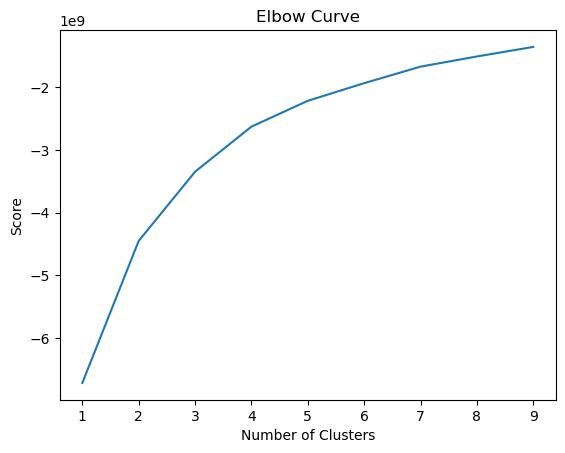

In [50]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

From the above elbow curve, it can be seen there's a gradual jump from two to three, then to four and a relative jump to five on the x-axis. Moreover, a straight jump is observed up to seven, but after eight the curve straightens out. This means that the optimal count for the clusters is five.

# 4. k-means clustering

In [71]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 5) 

In [72]:
# Fit the k-means object to the data.

kmeans.fit(df)

C:\Users\Tim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [73]:
df['clusters'] = kmeans.fit_predict(df)

C:\Users\Tim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Tim\AppData\Local\Temp\ipykernel_30152\1645658811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clusters'] = kmeans.fit_predict(df)


In [74]:
df.head()

,Sales,Profit,Shipping.Cost,Discount,Quantity,clusters
0,19,9.3312,4.37,0.0,3,0
1,19,9.2928,0.94,0.0,2,0
2,21,9.8418,1.81,0.0,3,0
3,111,53.2608,4.59,0.0,2,0
4,6,3.1104,1.32,0.0,1,0


In [75]:
df['clusters'].value_counts()

clusters
0    41026
3     7757
2     2030
1      464
4       13
Name: count, dtype: int64

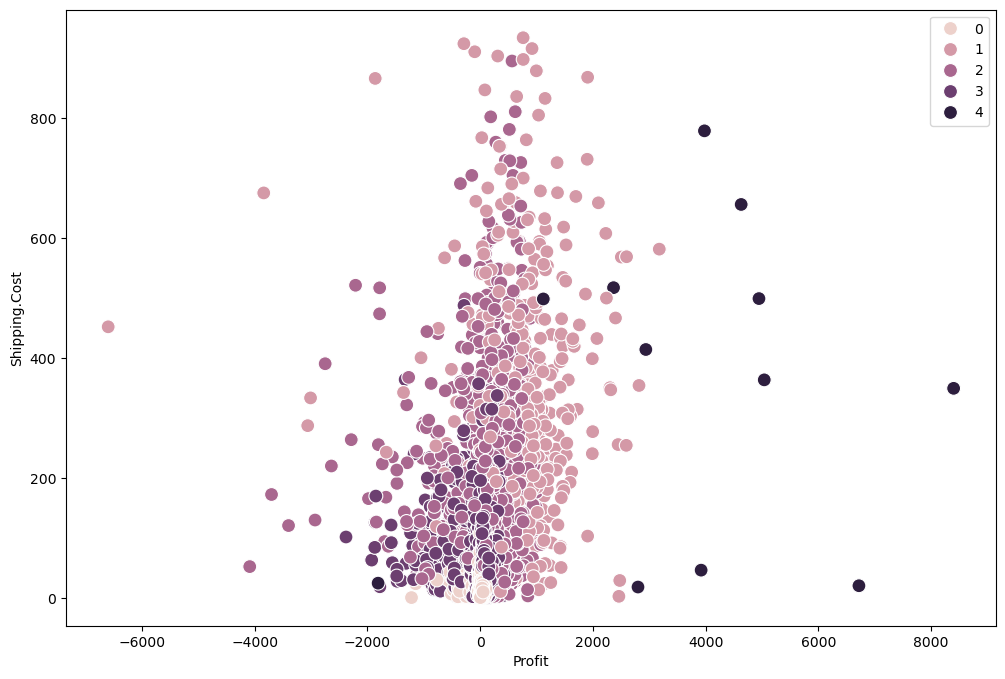

In [77]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Profit'], y=df['Shipping.Cost'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Profit') # Label x-axis.
plt.ylabel('Shipping.Cost') # Label y-axis.
plt.show()

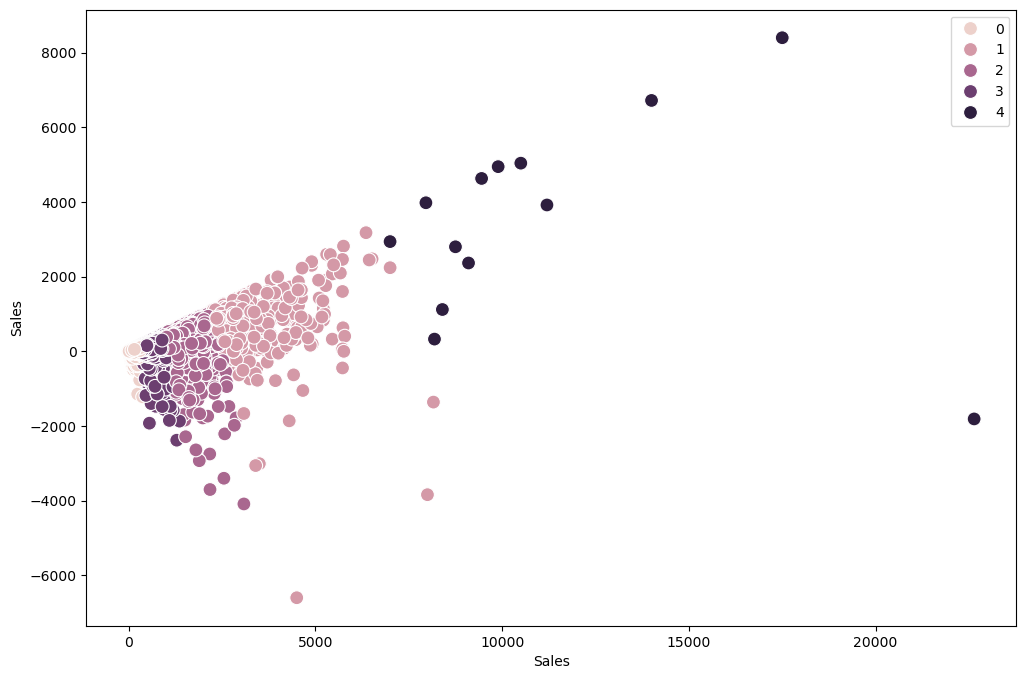

In [78]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Sales'], y=df['Profit'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Sales') # Label x-axis.
plt.ylabel('Sales') # Label y-axis.
plt.show()

In [80]:
df.loc[df['clusters'] == 3, 'cluster'] = 'dark pink'
df.loc[df['clusters'] == 2, 'cluster'] = 'pink'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 4, 'cluster'] = 'dark purple'

In [82]:
df.groupby('cluster').agg({'Sales':['mean', 'median'], 
                         'Profit':['mean', 'median'], 
                         'Shipping.Cost':['mean', 'median'],
                          'Quantity':['mean', 'median']})

Sales               Profit            Shipping.Cost  \
                      mean  median         mean     median          mean   
cluster                                                                    
dark pink       568.889777   523.0    57.840995    80.4000     62.170742   
dark purple   11121.307692  9450.0  3490.581300  3919.9888    322.965157   
light purple     86.580120    56.0     5.485624     6.5590      9.402983   
pink           1487.118719  1395.0   214.853345   254.8970    162.717086   
purple         3264.144397  2961.0   672.848361   712.1400    323.871190   

                       Quantity         
               median      mean median  
cluster                                 
dark pink      49.540  4.405440    4.0  
dark purple   363.190  6.615385    5.0  
light purple    5.190  3.156340    3.0  
pink          133.105  5.549261    5.0  
purple        286.370  7.103448    7.0

Overall analysis

dark pink

•	The sales and profit data indicate variability in transaction performance, with several outliers exhibiting sales and profit levels that deviate significantly from the majority. Nevertheless, the majority of transactions cluster around distinctive values.

•	The shipping costs exhibit greater skewness, with a minority of transactions incurring elevated shipping expenses.

•	The sales volume exhibits reduced variability, signifying uniform transaction sizes regarding the number of units sold.
 
dark purple:

•	The sales and profit within this cluster are significantly higher, suggesting that it comprises high-value transactions or clientele. The right skew in sales indicates that although the majority of transactions are concentrated around a moderately high value, a small number of substantial transactions are inflating the mean. 

•	The profit figures closely correspond with sales, indicating that higher sales typically correlate with increased profits in this cluster, despite a few transactions yielding lower profits. 

•	The shipping expenses are considerable, and the left-skew implies attempts to minimise costs in specific transactions.
 
•	The quantity is moderate, predominantly comprising transactions of 5 units, although larger orders elevate the average.
 
light purple:

•	Sales within this cluster are low, suggesting that these transactions are likely smaller and less lucrative, or that the customers possess diminished purchasing power relative to other clusters. 

•	Profit remains low yet relatively stable, indicating that despite small transaction sizes, most transactions yield a profit.

•	Shipping costs are moderate, with the majority of transactions occurring within a lower range, although some outliers exhibit elevated shipping costs.

•	The quantity remains uniform, with the majority of transactions comprising approximately three items, signifying minimal variability in order size within this cluster. 

pink:

•	The sales and profit metrics in this cluster are moderate to high, signifying that these transactions possess greater value than those in lower clusters, such as "light purple." This indicates that the cluster comprises more profitable customer segments or larger orders.

•	Profit exhibits a slight left skew, yet maintains consistency across the majority of transactions. The data indicates that most sales are lucrative, with a limited number of low-profit transactions adversely affecting the average. 

•	Shipping expenses are comparatively elevated; however, the majority of transactions fall within a moderate range. Certain outliers with elevated shipping expenses are influencing the mean.

•	The quantity remains relatively stable at approximately 5 units per transaction, signifying consistent order sizes. 

purple:

•	Sales within this cluster are high, signifying that the "purple" cluster comprises customers or transactions of considerable value to the enterprise.

•	Profitability is robust, and the profit distribution indicates that the majority of transactions are highly lucrative. A handful of outliers with diminished profits marginally decrease the average; however, profitability remains robust.

•	Shipping expenses are comparatively high yet stable, with certain transactions incurring exceptionally high shipping costs. 

•	The quantity per transaction remains consistent, with the majority of orders comprising approximately 7 items, suggesting that customers within this cluster generally acquire a moderate number of items per transaction.


# Propose what these results could be useful for in future steps of an analytics pipeline.

These results establish a robust basis for subsequent actions in the analytics pipeline, emphasising profitability, customer retention, marketing strategy, shipping cost reduction, and additional factors. Utilising the insights derived from the "purple" cluster, the enterprise can enhance operations, stimulate growth, and secure long-term sustainability.